In [1]:
import pandas as pd
df = pd.read_csv("Phoenix_restaurant_review_Results.csv", encoding="latin1")

In [2]:
df.shape

(4546, 7)

In [3]:
average_pscore = []
for row in df.iterrows():
    average_pscore = (df['positive_polarity'] + df['negative_polarity']) /2

In [4]:
len(average_pscore)

4546

In [7]:
df['average_pscore'] = average_pscore

In [8]:
df.head()

,business_id,review_text,review_star,positive_phrases,positive_polarity,negative_phrases,negative_polarity,average_pscore
0,jKhfsXol4FxbRjK8aUsLA,Well I wish I could say something positive but...,1,[],0.000000,"[u' little ceasers', u"" n't happy""]",-0.5875,-0.293750
1,jKhfsXol4FxbRjK8aUsLA,My kids insisted on trying the Bacon Wrapped D...,3,"[u' not bad', u' good option', u' quick meal']",1.383333,[],0.0000,0.691667
2,jKhfsXol4FxbRjK8aUsLA,Worst customer service from the little girl wh...,1,[],0.000000,"[u' little girl', u' small joint']",-0.4375,-0.218750
3,jKhfsXol4FxbRjK8aUsLA,"Strange, as a kid for I remember that I did no...",4,[u' wonderfully good'],0.700000,[u' thick crust'],-0.3000,0.200000
4,jKhfsXol4FxbRjK8aUsLA,Best $8 deep dish pizza I have had in a while....,5,[u' easy meal'],0.433333,[],0.0000,0.216667


In [9]:
average_pscore = list(df['average_pscore'])
len(average_pscore)

4546

In [10]:
polarity_labels = []
for val in average_pscore:
    if val < 0:
        polarity_labels.append('Bad')
    else:
        polarity_labels.append('Good')

In [11]:
len(polarity_labels) 

4546

In [12]:
df['polarity_labels'] = polarity_labels

In [13]:
df.head()

,business_id,review_text,review_star,positive_phrases,positive_polarity,negative_phrases,negative_polarity,average_pscore,polarity_labels
0,jKhfsXol4FxbRjK8aUsLA,Well I wish I could say something positive but...,1,[],0.000000,"[u' little ceasers', u"" n't happy""]",-0.5875,-0.293750,Bad
1,jKhfsXol4FxbRjK8aUsLA,My kids insisted on trying the Bacon Wrapped D...,3,"[u' not bad', u' good option', u' quick meal']",1.383333,[],0.0000,0.691667,Good
2,jKhfsXol4FxbRjK8aUsLA,Worst customer service from the little girl wh...,1,[],0.000000,"[u' little girl', u' small joint']",-0.4375,-0.218750,Bad
3,jKhfsXol4FxbRjK8aUsLA,"Strange, as a kid for I remember that I did no...",4,[u' wonderfully good'],0.700000,[u' thick crust'],-0.3000,0.200000,Good
4,jKhfsXol4FxbRjK8aUsLA,Best $8 deep dish pizza I have had in a while....,5,[u' easy meal'],0.433333,[],0.0000,0.216667,Good


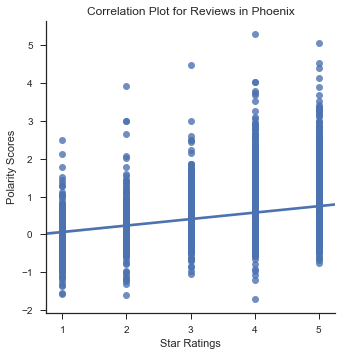

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
sns.lmplot('review_star','average_pscore',data=df, fit_reg=True)

plt.xlabel("Star Ratings")
plt.ylabel("Polarity Scores")
plt.title("Correlation Plot for Reviews in Phoenix")

In [15]:
df['average_pscore'].min()

-1.7214285715000002

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [18]:
X = df[['review_star','average_pscore']]
y = df['polarity_labels']
X.shape
y.shape

(4546L,)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=3057)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
clf = SVC(C=0.5, kernel="linear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

(3636, 2)
(3636L,)
(910, 2)
(910L,)


0.99890109890109891

In [20]:
print(y_pred[:5])
print('*'*50)
print(y_test[:5])

['Good' 'Good' 'Good' 'Good' 'Good']
**************************************************
2135    Good
3274    Good
969     Good
838     Good
3918    Good
Name: polarity_labels, dtype: object


In [21]:
from collections import Counter
print(Counter(y_test))

Counter({'Good': 763, 'Bad': 147})


In [31]:
float(763)/ (763+147)

0.8384615384615385

A dummy classifier that guess the majority label (Good reviews) would get an accuracy of 83.84%. 

In [32]:
confusion_matrix(y_test, y_pred)

array([[147,   0],
       [  1, 762]])

Of the Bad reviews, all 147 were classified correctly and 0 incorrectly.

Of the Good reviews, 762 were classified correctly and 1 incorrectly.

In [33]:
f1_score(y_test, y_pred, average=None)

array([ 0.99661017,  0.99934426])

In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, X, y, scoring="accuracy", cv=6)

import numpy as np
print("Average accuracy, 6-fold cross validation:")
print(np.mean(scores))

Average accuracy, 6-fold cross validation:
0.918383522316


In [32]:
df_business = pd.read_csv("yelp_restaurants_business_data.csv")

In [33]:
df_business.shape

(3353, 12)

In [34]:
df_business.head()

,Unnamed: 0,attributes,business_id,categories,city,hours,is_open,name,postal_code,review_count,stars,state
0,0,"['Alcohol: full_bar', ""Ambience: {'romantic': ...",YPavuOh2XsnRbLfl0DH2lQ,"['Restaurants', 'Waffles', 'Southern', 'Soul F...",Phoenix,"['Monday 9:0-22:0', 'Tuesday 9:0-22:0', 'Wedne...",1,Lo-Lo's Chicken & Waffles,85003.0,1276,4.0,AZ
1,1,NaN,F53MSa5SYzO9BG8c_JhskQ,"['Vietnamese', 'Restaurants']",Phoenix,NaN,0,Pho Viet,85051.0,3,2.5,AZ
2,2,"['Alcohol: none', ""Ambience: {'romantic': Fals...",hEcn9k6ONd5n2mq0lB2aew,"['American (Traditional)', 'Restaurants']",Phoenix,"['Monday 6:0-22:0', 'Tuesday 6:0-22:0', 'Wedne...",1,JB's Restaurant,85051.0,24,3.5,AZ
3,3,"['Alcohol: none', ""Ambience: {'romantic': Fals...",Ld2hhA3q3cdkptwS1fsYEg,"['Restaurants', 'Noodles', 'Sushi Bars', 'Japa...",Phoenix,"['Monday 11:0-21:0', 'Tuesday 11:0-21:0', 'Wed...",1,Yogi's Grill,85085.0,51,4.0,AZ
4,4,"['BikeParking: True', 'BusinessAcceptsCreditCa...",a48i_DFln5e1oaJKNM6BUg,"['Fast Food', 'Sandwiches', 'Restaurants']",Phoenix,NaN,1,Subway,85027.0,5,2.5,AZ


In [35]:
df_postal = df_business[(df_business['postal_code']== 85051.0)]

In [37]:
df_postal.shape

(99, 12)

In [38]:
df_pizza = df_postal[df_postal['categories'].apply(lambda x: 'Pizza' in x )].reset_index(drop=True)

In [39]:
df_pizza.shape

(12, 12)

In [40]:
df_pizza.to_csv('yelp_reviews_pizza.csv')

In [41]:
df_pizza.groupby(["stars", "business_id"])["stars"].agg("count")

stars  business_id           
2.5    2v-8QQfMLX2PCz-0S6gISQ    1
       DdlJsYusOm6iudcm77CPxA    1
       MZwBo-3MTbxTln2YmyqOHQ    1
       y4jOgvovJ8JX3yRSzu7yUg    1
3.0    Cml4Yt5cTx64cOManHe-Gw    1
       K0Odlnc5zKdDPwHwvQvEAA    1
       OMV-pNZWEh9BkoYB2KNNVA    1
3.5    O00LTi6SV8vCVND_8k1YVw    1
       gJ7WFBtT3uSkI5eP9NlKrQ    1
4.0    BU67sB_pedm_QsNhISvYIQ    1
       K--ma2GS7bg1W96edq3V9g    1
4.5    5MNYCmCtpBboglFmrjU6yw    1
Name: stars, dtype: int64

In [35]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
df_phrase_cat = pd.read_csv("CategorizingPhrases_Visualization.csv", encoding="latin-1")

In [36]:
df_phrase_cat.head()

,Unnamed: 0,Positive,Negative,Total
0,Cat A,23,13,36
1,Cat B,20,11,31
2,Cat C,35,10,45
3,Cat D,26,10,36
4,Cat E,5,2,7


In [37]:
del df_phrase_cat['Total']

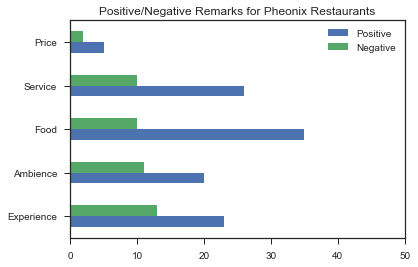

In [38]:
ax=df_phrase_cat.plot.barh()
plt.xlim([0,50])
ax.set_yticklabels(['Experience', 'Ambience','Food','Service','Price'])
plt.title("Positive/Negative Remarks for Pheonix Restaurants")

In [39]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
df_phrase_stacked = pd.read_csv("Phrase_visualization_stackedbar.csv", encoding="latin-1")

In [40]:
df_phrase_stacked.head()

,Unnamed: 0,Positive,Negative
0,CatA,64,36
1,CatB,65,35
2,CatC,78,22
3,CatD,72,28
4,CatE,71,29


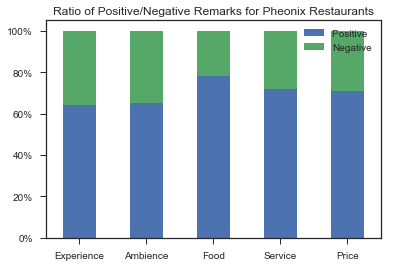

In [41]:
ax=df_phrase_stacked.plot.bar(stacked = True)
#type(ax)
vals = ax.get_yticks()

ax.set_yticklabels(['{:.0f}%'.format(y) for y in vals])
ax.set_xticklabels(['Experience', 'Ambience','Food','Service','Price'],rotation='horizontal')

plt.title("Ratio of Positive/Negative Remarks for Pheonix Restaurants")
plt.show()

In [53]:
df_pizza.head()

,Unnamed: 0,attributes,business_id,categories,city,hours,is_open,name,postal_code,review_count,stars,state
0,224,"['Alcohol: none', ""Ambience: {'romantic': Fals...",gJ7WFBtT3uSkI5eP9NlKrQ,"['Pizza', 'Chicken Wings', 'Restaurants']",Phoenix,"['Monday 11:30-23:0', 'Tuesday 11:30-23:0', 'W...",0,Cleopatra Bistro Pizza,85051.0,12,3.5,AZ
1,599,"['Alcohol: none', 'BikeParking: False', 'Busin...",2v-8QQfMLX2PCz-0S6gISQ,"['Restaurants', 'Fast Food', 'Pizza']",Phoenix,"['Monday 10:30-0:0', 'Tuesday 10:30-0:0', 'Wed...",1,Papa John's Pizza,85051.0,6,2.5,AZ
2,635,"['Alcohol: beer_and_wine', ""Ambience: {'romant...",MZwBo-3MTbxTln2YmyqOHQ,"['Pizza', 'Mexican', 'Seafood', 'Cajun/Creole'...",Phoenix,NaN,0,Crab Zone,85051.0,24,2.5,AZ
3,856,"['Alcohol: none', ""Ambience: {'romantic': Fals...",5MNYCmCtpBboglFmrjU6yw,"['Pizza', 'Chicken Wings', 'Italian', 'Salad',...",Phoenix,"['Monday 11:0-21:0', 'Tuesday 11:0-21:0', 'Wed...",1,R.Kidd's Pizza & Wings,85051.0,36,4.5,AZ
4,1534,"['Alcohol: none', 'BusinessAcceptsCreditCards:...",Cml4Yt5cTx64cOManHe-Gw,"['Sandwiches', 'Restaurants', 'Pizza', 'Chicke...",Phoenix,"['Monday 10:0-0:0', 'Tuesday 10:0-0:0', 'Wedne...",1,Domino's Pizza,85051.0,8,3.0,AZ


In [54]:
low_star = df_pizza[df_pizza['stars'] < 3]

In [56]:
high_star = df_pizza[df_pizza['stars'] > 3]

In [96]:
high_star_bid = list(high_star['business_id'])

In [57]:
low_star_bid = list(low_star['business_id'])

In [65]:
low_star_bid

['2v-8QQfMLX2PCz-0S6gISQ',
 'MZwBo-3MTbxTln2YmyqOHQ',
 'DdlJsYusOm6iudcm77CPxA',
 'y4jOgvovJ8JX3yRSzu7yUg']

In [59]:
df_pizza_phrases = pd.read_csv("Phoenix_restaurant_reviews_Pizza_Results.csv", encoding="latin-1")

In [60]:
df_pizza_phrases.shape

(27858, 7)

In [61]:
df_pizza_bid = list(df_pizza_phrases['business_id'])

In [62]:
len(df_pizza_bid)

27858

In [83]:
df_pizza_phrases.loc[df_pizza_phrases['business_id'] == '2v-8QQfMLX2PCz-0S6gISQ', 'negative_phrases']

21105    [u' feat/nearly impossible']
21106                              []
Name: negative_phrases, dtype: object

In [98]:
for id in low_star_bid:
    if id in df_pizza_bid:
        print("Business ID", id, "not performing well due to")
        print("-"*70)
        print(df_pizza_phrases.loc[df_pizza_phrases['business_id'] == id, 'negative_phrases'])
    else:
        continue
    print("*"*70)

Business ID 2v-8QQfMLX2PCz-0S6gISQ not performing well due to
----------------------------------------------------------------------
21105    [u' feat/nearly impossible']
21106                              []
Name: negative_phrases, dtype: object
**********************************************************************
Business ID MZwBo-3MTbxTln2YmyqOHQ not performing well due to
----------------------------------------------------------------------
17905                    [u' very weird', u' really dark']
17906                                       [u" n't sure"]
17907                                        [u' so dark']
17908    [u' little random', u' chicken tenders', u' li...
17909                                                   []
17910                                                   []
17911                               [u' completely empty']
17912                                                   []
17913                                       [u' ice cold']
17914             

In [97]:
for id in high_star_bid:
    if id in df_pizza_bid:
        print("Business ID", id, "performing well due to")
        print("-"*70)
        print(df_pizza_phrases.loc[df_pizza_phrases['business_id'] == id, 'positive_phrases'])
    else:
        continue
    print("*"*70)

Business ID gJ7WFBtT3uSkI5eP9NlKrQ performing well due to
----------------------------------------------------------------------
596    [u' great pizza', u' free samples', u' really ...
597                                       [u' so fresh']
598               [u' very impressed', u' just amazing']
599                                                   []
600    [u' fresh oregano', u' fresh oregeno', u' hot ...
601    [u' very impressed', u' very impressed', u' GR...
602                                        [u" n't bad"]
603                                                   []
604                    [u' Really good', u' nice place']
605              [u' delicious cheese', u' so friendly']
Name: positive_phrases, dtype: object
**********************************************************************
Business ID 5MNYCmCtpBboglFmrjU6yw performing well due to
----------------------------------------------------------------------
17608    [u' great pizza', u' delicious chicken', u' mo...
1760

Looking at the negative phrases of the low star restaurants(<3) and the positive phrases of the well-performing restaurants(Ratings >3), overall people seem to be complaining a lot about the quality of food, the food being unnecessarily expensive and bad service in the low-performing restaurants. So these things fall under the five categories that we had created. So it's fair to say that having provided the qualitativ feedback about these low-performing restaurants, we are helping them improve their business and be competent in the area with other successful restaurants. Only drawback is if we could avoid the eye-balling of phrases between two types of restaurants and automate this process of providing suggestions, it would be great. 